<a href="https://colab.research.google.com/github/LPrasanna0709/Data-Driven-Insights-for-Supermarket-Sales---Churn-Analysis-/blob/main/5100_group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

 In our exploration of customer behavior within the grocery dataset, we initially applied machine learning, specifically XGBoost, to identify the top influencing features for user retention, achieving an impressive 82% accuracy. Building on this success, we adopted an alternative approach to uncover patterns in product behaviors that impact customer retention. The initial data insights are promising, and we anticipate further refinement to deepen our understanding of user behavior.




# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

# Model preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from patsy import dmatrices
!pip install apyori
from apyori import apriori
import xgboost as xgb

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import uniform, randint

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn import metrics

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Regular expressions
import re
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=8bd1790748791c9f4817b24397f761c8eb8043e4e4386aff6d8ceab2715fc834
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


/usr/local/lib/python3.10/dist-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/usr/local/lib/python3.10/dist-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


# The data

This project utilizes a single data set Groceries_dataset.csv.

Date: The date of observation

Member_number:	Customer ID/ User ID

itemDescription: Items purchased by customers

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/prasannakumarn0709/Groceries_Data-Driven-Insights/main/Groceries_dataset%202.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# State your questions

## Explore the contents of the data sets

Exploring the dataset. We can see the names of the columns and how do the values look like.

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


To get the summary of the DataFrame. Also gives the data types of each column and the number of non-null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Checking the first and last date of the data.

In [ ]:
df['Date'].agg(['min', 'max'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


min    01-01-2014
max    31-10-2015
Name: Date, dtype: object

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


# Data preparation

##### Checking if there are any duplicate rows

In [ ]:
df.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


759

In [ ]:
df[df.duplicated(keep=False)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
63,1663,07-02-2015,rolls/buns
98,3645,12-12-2015,citrus fruit
129,3779,15-09-2015,frankfurter
213,3812,21-07-2015,sausage
216,1344,04-09-2015,bottled water
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


In [ ]:
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
df = df.sort_values(by='Member_number')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Purchase Date Only'] = df['Date'].dt.date

<ipython-input-13-68dadf36b00e>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
from dateutil.relativedelta import relativedelta
df['Quarter_Retention'] = 0
# Iterate over each row
for index, row in df.iterrows():
    # Get the member number
    member_number = row['Member_number']
    # Get the date
    date = row['Date']
    # Get the next calendar month's start date
    next_calendar_month_start_date = date.replace(day=1) + relativedelta(months=1)
    # Get the next calendar month's last date
    next_calendar_month_last_date = next_calendar_month_start_date + relativedelta(day=1, months=24, days=-1)
    # Check if the member bought item in next calendar month
    if df[(df['Member_number'] == member_number) & ((df['Date'] >= next_calendar_month_start_date ) & (df['Date'] <= next_calendar_month_last_date))].shape[0] > 0:
        # If yes, set the retention to 1
        df.loc[index, 'Retention'] = 1
# Print the dataframe
print(df)
df.describe()
df['Retention'].value_counts()

       Member_number       Date        itemDescription Purchase Date Only  \
17778           1000 2015-05-27     pickled vegetables         2015-05-27   
8395            1000 2015-03-15             whole milk         2015-03-15   
24544           1000 2015-03-15                 yogurt         2015-03-15   
13331           1000 2014-06-24             whole milk         2014-06-24   
18196           1000 2015-07-24        misc. beverages         2015-07-24   
...              ...        ...                    ...                ...   
11728           5000 2014-09-03  fruit/vegetable juice         2014-09-03   
19727           5000 2015-10-02        root vegetables         2015-10-02   
3578            5000 2015-10-02                   soda         2015-10-02   
34885           5000 2015-10-02    semi-finished bread         2015-10-02   
27877           5000 2014-09-03                 onions         2014-09-03   

       Quarter_Retention  Retention  
17778                  0        1.0  

1.0    26325
Name: Retention, dtype: int64

In [ ]:
#create new 'Year_Quarter' column
from dateutil.relativedelta import relativedelta
df['Year_Quarter'] = pd.to_datetime(df['Date']).dt.to_period('Q').dt.strftime('%Y-Q%q')
df['next_Year_Quarter'] = pd.to_datetime(df['Date']).apply(lambda x: (x + relativedelta(months=3)).to_period('Q').strftime('%Y-Q%q'))
df['Date'] = pd.to_datetime(df['Date'])
#df['Purchase Date Only'] = pd.to_datetime(df['Purchase Date Only'])
df['Retention'] = df.groupby('Member_number')['Year_Quarter'].transform('nunique').apply(lambda x: 1 if x > 1 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Month_Year'] = df['Date'].dt.strftime('%m/%Y')
max_date = df['Date'].max()

last_month_date = max_date - datetime.timedelta(days=28)

#filtering last month entries
df = df[df['Date'] < last_month_date ]

#writing last month entries to csv
df.to_csv('retention_data.csv', index=False)

In [ ]:
df_t = df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

df['Values'] = 1
df_items = df.pivot_table(index=['Member_number','Retention'], columns='itemDescription', values='Values', aggfunc='sum').fillna(0).reset_index()

df_items


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Member_number,Retention,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,4996,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3894,4997,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3895,4998,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,4999,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_items.rename(columns=str.lower, inplace=True)

df_items.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,member_number,retention,instant food products,uht-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [ ]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Columns: 169 entries, member_number to zwieback
dtypes: float64(167), int64(2)
memory usage: 5.0 MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Retention_counts = df_items['retention'].value_counts()
Retention_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    3459
0     439
Name: retention, dtype: int64

## Identify missing values

In [ ]:
df_items.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription
member_number            0
retention                0
instant food products    0
uht-milk                 0
abrasive cleaner         0
                        ..
white bread              0
white wine               0
whole milk               0
yogurt                   0
zwieback                 0
Length: 169, dtype: int64

# EDA

In [ ]:
df_group = df.groupby('Member_number')['Date'].nunique()

# Compute histogram of customer count for #days visited without binning
hist, bin_edges = np.histogram(df_group,bins=np.arange(min(df_group), max(df_group) + 1, 1))

# Print the histogram into a dataframe
df_hist = pd.DataFrame({'Number of Days Visited': bin_edges[:-1], 'Customer Count': hist})

# Print it in sorting order
df_hist.sort_values(by='Number of Days Visited', ascending=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Number of Days Visited,Customer Count
0,1,349
1,2,689
2,3,811
3,4,767
4,5,552
5,6,381
6,7,208
7,8,67
8,9,48
9,10,26


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


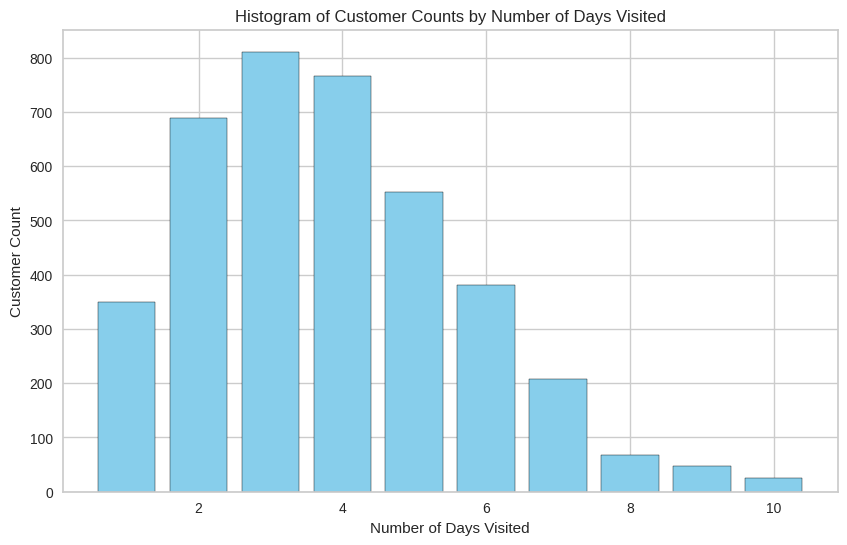

In [ ]:

# Compute histogram of customer count for #days visited without binning
hist, bin_edges = np.histogram(df_group, bins=np.arange(min(df_group), max(df_group) + 1, 1))

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist, width=0.8, align='center', color='skyblue', edgecolor='black')
plt.title('Histogram of Customer Counts by Number of Days Visited')
plt.xlabel('Number of Days Visited')
plt.ylabel('Customer Count')
plt.show()


In [ ]:
item_purchase_count = df['itemDescription'].value_counts()
item_purchase_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


whole milk               2363
other vegetables         1827
rolls/buns               1646
soda                     1453
yogurt                   1285
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: itemDescription, Length: 167, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


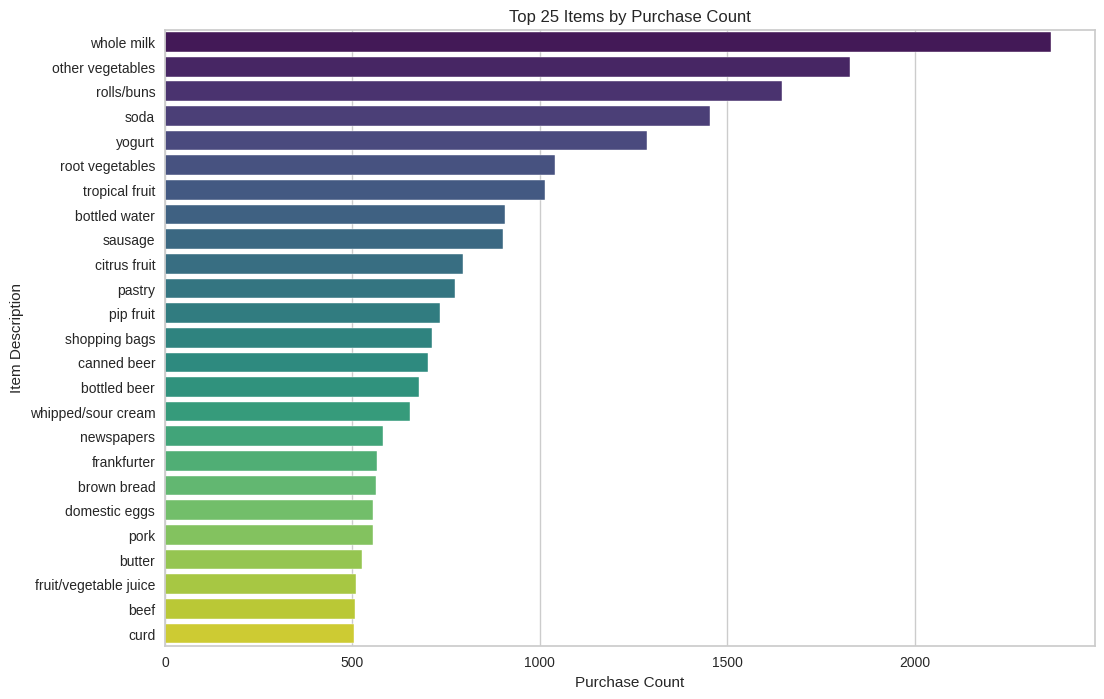

In [ ]:
item_purchase_count = df['itemDescription'].value_counts()

# Extract the top 25 items
top_25_items = item_purchase_count.head(25)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_items.values, y=top_25_items.index, palette='viridis')
plt.title('Top 25 Items by Purchase Count')
plt.xlabel('Purchase Count')
plt.ylabel('Item Description')
plt.show()

In [ ]:

item_purchase_count = df['itemDescription'].value_counts()

# Extract the top 25 items
top_25_items = item_purchase_count.head(25)
top_25_items



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


whole milk               2363
other vegetables         1827
rolls/buns               1646
soda                     1453
yogurt                   1285
root vegetables          1041
tropical fruit           1014
bottled water             908
sausage                   903
citrus fruit              795
pastry                    774
pip fruit                 734
shopping bags             712
canned beer               702
bottled beer              678
whipped/sour cream        654
newspapers                582
frankfurter               565
brown bread               563
domestic eggs             555
pork                      555
butter                    527
fruit/vegetable juice     509
beef                      508
curd                      504
Name: itemDescription, dtype: int64

In [ ]:

df['Purchase Date Only'] = pd.to_datetime(df['Purchase Date Only'])

# Extract year-month information
df['year_month'] = df['Purchase Date Only'].dt.to_period('M')

# Group by 'Member_number' and count the occurrences
df_monthly_counts = df.groupby(['year_month', 'Member_number']).size().reset_index(name='customer_count')

# Plot the bar plot
plt.figure(figsize=(12, 8))
df_monthly_counts.groupby('year_month')['customer_count'].count().plot(kind='bar', color='skyblue')
plt.title('Number of Customers Visiting per Month')
plt.xlabel('Year-Month')
plt.ylabel('Customer Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: ignored

In [ ]:
retained_counts = df[[ 'Member_number','Retention']].drop_duplicates().astype(int)

# Count the number of retained and non-retained customers
retained_counts = retained_counts['Retention'].value_counts()
retained_counts


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    3459
0     439
Name: Retention, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


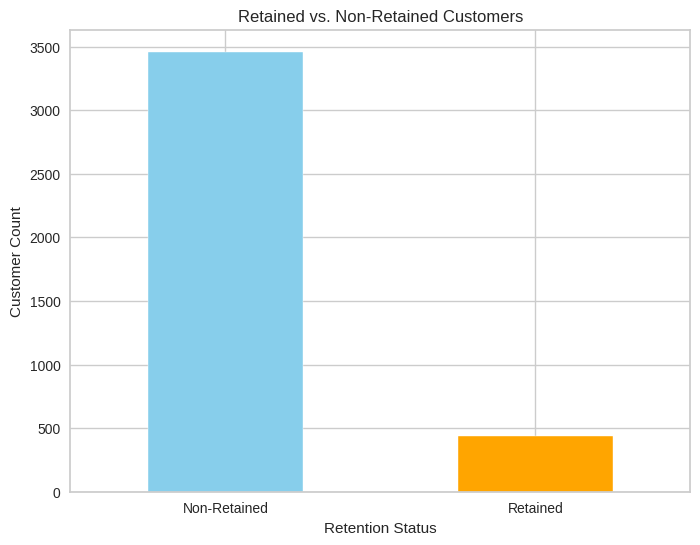

In [ ]:

# Plot the bar plot
plt.figure(figsize=(8, 6))
retained_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Retained vs. Non-Retained Customers')
plt.xlabel('Retention Status')
plt.ylabel('Customer Count')
plt.xticks(ticks=[0, 1], labels=['Non-Retained', 'Retained'], rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


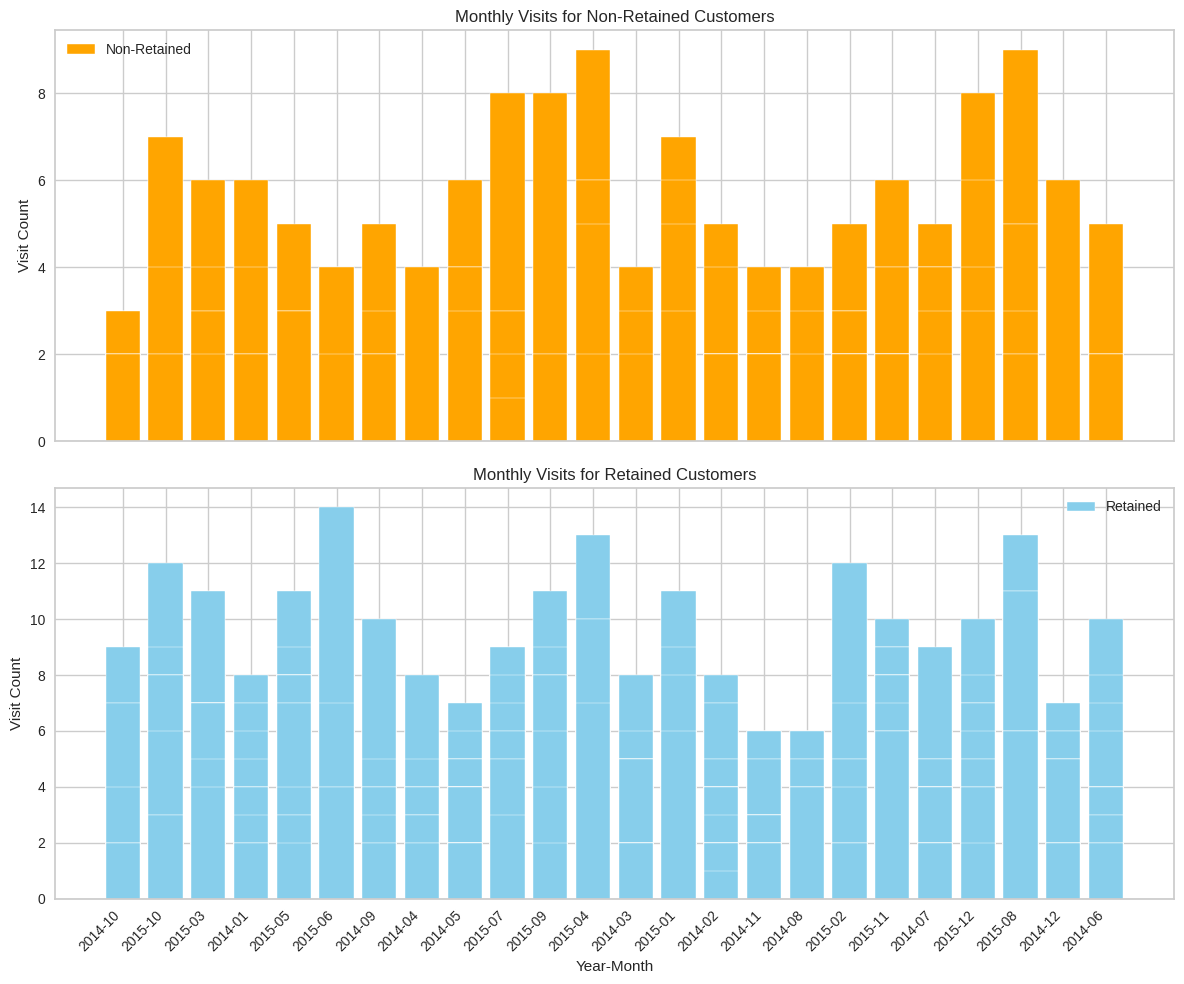

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert 'Purchase Date Only' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year-month information
df['year_month'] = df['Date'].dt.to_period('M')

# Group by 'Retention' and 'Member_number', then count the occurrences
df_monthly_counts = df.groupby(['Retention', 'Member_number', 'year_month']).size().reset_index(name='visit_count')

# Create two separate DataFrames for retention status 0 and 1
retention_0 = df_monthly_counts[df_monthly_counts['Retention'] == 0]
retention_1 = df_monthly_counts[df_monthly_counts['Retention'] == 1]

# Create two separate bar plots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Bar plot for retention status 0
axes[0].bar(retention_0['year_month'].astype(str), retention_0['visit_count'], color='orange', label='Non-Retained')
axes[0].set_title('Monthly Visits for Non-Retained Customers')
axes[0].set_ylabel('Visit Count')
axes[0].legend()

# Bar plot for retention status 1
axes[1].bar(retention_1['year_month'].astype(str), retention_1['visit_count'], color='skyblue', label='Retained')
axes[1].set_title('Monthly Visits for Retained Customers')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Visit Count')
axes[1].legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


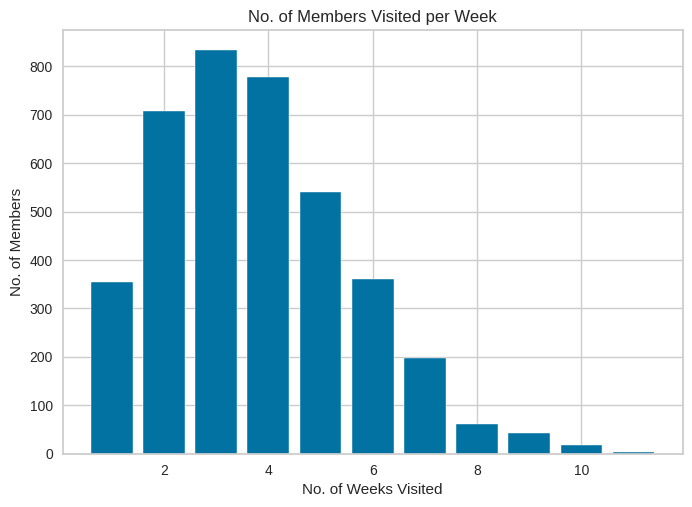

In [ ]:
import matplotlib.pyplot as plt

df['NoofWeeksVisited'] = df.groupby('Member_number')['Date'].transform(lambda x: len(x.dt.to_period('W').unique()))
# Get the distinct Member_number values for each NoofWeeksVisited value
result = df.groupby('NoofWeeksVisited')['Member_number'].nunique()

# Plot the barplot
plt.bar(result.index, result.values)
plt.xlabel('No. of Weeks Visited')
plt.ylabel('No. of Members')
plt.title('No. of Members Visited per Week')
plt.show()

In [ ]:
# Create a new dataframe to store the results
df_result = pd.DataFrame()

# Get the unique members
members = df['Member_number'].unique()

# Iterate through each member
for member in members:
    # Get the data for the member
    df_member = df[df['Member_number'] == member]

    # Get the start date for the member
    start_date = df_member['Date'].min()

    # Get the number of weeks between start date and last date
    num_weeks = (df['Date'].max() - start_date).days/7

    # Get the number of weeks the member visited the store
    num_weeks_visited = len(df_member['Date'].dt.to_period('W').unique())

    # Calculate the percentage of weeks visited
    percentage_weeks_visited = num_weeks_visited/(num_weeks+1)

    # Add the result to the dataframe
    #Use the pandas.concat() method instead of the frame.append() method:

    #df_result = pd.concat([df_result, {'Member_number': member, 'PercentageWeeksVisited': percentage_weeks_visited}], ignore_index=True)
    df_result = pd.concat([df_result, pd.DataFrame({'Member_number': member, 'PercentageWeeksVisited': percentage_weeks_visited}, index=[0])], ignore_index=True)
    #df_result = df_result.append({'Member_number': member, 'PercentageWeeksVisited': percentage_weeks_visited}, ignore_index=True)

# Merge the result dataframe with the original dataframe
df = df.merge(df_result, on='Member_number', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['PercentageWeeksVisited'] = df['PercentageWeeksVisited'].apply(lambda x: 0.15 if x > 0.15 else x)
count_per_percentage = df.groupby(pd.cut(df['PercentageWeeksVisited'], 25))['Member_number'].nunique()
print(count_per_percentage.sort_values(ascending=False))

PercentageWeeksVisited
(0.0376, 0.0432]    533
(0.0264, 0.032]     380
(0.0489, 0.0545]    365
(0.0432, 0.0489]    358
(0.0545, 0.0601]    326
(0.032, 0.0376]     325
(0.0208, 0.0264]    282
(0.0601, 0.0657]    246
(0.0657, 0.0713]    209
(0.0152, 0.0208]    198
(0.0713, 0.077]     140
(0.0094, 0.0152]    134
(0.077, 0.0826]      99
(0.0826, 0.0882]     72
(0.0882, 0.0938]     54
(0.0938, 0.0994]     39
(0.144, 0.15]        35
(0.0994, 0.105]      29
(0.105, 0.111]       29
(0.111, 0.116]       13
(0.116, 0.122]       11
(0.122, 0.128]        9
(0.133, 0.139]        6
(0.128, 0.133]        3
(0.139, 0.144]        3
Name: Member_number, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## ML modelling to detect the feature importance


## Train test split

Done modelling for items and retention

X = items in Data

y = retention

In [ ]:
df_items_ml = df_items
df_items_ml.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,member_number,retention,instant food products,uht-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0


In [ ]:
df_items_ml = df_items_ml[df_items_ml['retention'] == 1].sample(frac=0.66).append(df_items_ml[df_items_ml['retention'] == 0])
retained_counts = df_items_ml['retention'].value_counts()
retained_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-50-bb8008afb4a2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_items_ml = df_items_ml[df_items_ml['retention'] == 1].sample(frac=0.66).append(df_items_ml[df_items_ml['retention'] == 0])


1    2283
0     290
Name: retention, dtype: int64

In [ ]:
filepath = '/content/drive/retention_data_ml.csv'
df_items_ml.to_csv('/retention_data_ml.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X = df_items_ml.drop(columns = ['member_number', 'retention'])

y = df_items_ml['retention']

y.head()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


824     1
395     1
756     1
366     1
1261    1
Name: retention, dtype: int64

In [ ]:
X.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,instant food products,uht-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
395,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1261,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


##### $\rightarrow$ Split the data into training and testing sets. Keep 20% of the data for the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 100)
print(X_train.shape, X_test.shape)

(2058, 167) (515, 167)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### $\rightarrow$ Check that the training and testing input variables have similar means and standard deviations.

### Scale the numerical predictor variables in the training set to have mean 0 and standard deviation 1.

In [ ]:
numerical_columns = X_train.select_dtypes(include='number').columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
scaler = StandardScaler().fit(X_train[numerical_columns])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perform the scaling transform on the predictors in the training and testing sets.

In [ ]:
X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Imputation

In [ ]:
imputer = IterativeImputer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_train.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,instant food products,uht-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
2436,-0.127657,3.164084,-0.073306,-0.093934,-0.031189,-0.022049,-0.177705,-0.054074,-0.357599,-0.287432,...,-0.139601,-0.11771,-0.261435,-0.404189,-0.022049,-0.306974,-0.214052,0.538629,-0.569928,-0.123667
807,-0.127657,-0.290391,-0.073306,-0.093934,-0.031189,-0.022049,-0.177705,-0.054074,-0.357599,-0.287432,...,-0.139601,-0.11771,-0.261435,-0.404189,-0.022049,-0.306974,-0.214052,-0.782585,1.183302,-0.123667
1875,-0.127657,-0.290391,-0.073306,-0.093934,-0.031189,-0.022049,-0.177705,-0.054074,-0.357599,-0.287432,...,-0.139601,-0.11771,-0.261435,-0.404189,-0.022049,-0.306974,-0.214052,0.538629,-0.569928,-0.123667
1586,-0.127657,-0.290391,-0.073306,-0.093934,-0.031189,-0.022049,-0.177705,-0.054074,-0.357599,-0.287432,...,-0.139601,-0.11771,-0.261435,-0.404189,-0.022049,-0.306974,-0.214052,0.538629,1.183302,-0.123667
3879,-0.127657,-0.290391,-0.073306,-0.093934,-0.031189,-0.022049,-0.177705,-0.054074,-0.357599,-0.287432,...,-0.139601,-0.11771,-0.261435,-0.404189,-0.022049,-0.306974,-0.214052,-0.782585,-0.569928,-0.123667


In [ ]:

# Assuming 'description' and 'purchase_date' are the non-numeric columns you want to exclude
non_numeric_columns = ['itemdescription', 'purchase date only']

# Identify numeric columns
numeric_columns = X_train.select_dtypes(include=['number']).columns

# Exclude non-numeric columns
numeric_columns_to_impute = [col for col in numeric_columns if col not in non_numeric_columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
imputer.fit(X_train.loc[:, numeric_columns_to_impute])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IterativeImputer()

In [ ]:
X_train.loc[:, numeric_columns_to_impute] = imputer.transform(X_train.loc[:, numeric_columns_to_impute])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### $\rightarrow$ Create data frames that join the predictor variables and output variable for the training and testing data.

In [ ]:
df_train = X_train.join(y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_test = X_test.join(y_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pred_null = np.zeros(len(y_test))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(classification_report(y_test, pred_null))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.13      1.00      0.23        67
           1       0.00      0.00      0.00       448

    accuracy                           0.13       515
   macro avg       0.07      0.50      0.12       515
weighted avg       0.02      0.13      0.03       515



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Modeling

In [ ]:
xgb_model = xgb.XGBClassifier()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 6),
    "n_estimators": randint(100, 150),
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model,
                            param_distributions=params,
                            n_iter=200,
                            cv=5,
                            verbose=1,
                            n_jobs=-1,
                            return_train_score=True)

search.fit(X_train,
           y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a85b8527640>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a85b8527fd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a85b8564340>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a85b8564160>},
                   return_train_score=True, verbose=1)

In [ ]:
search.best_params_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'colsample_bytree': 0.7538017240284515,
 'gamma': 0.4497269978348595,
 'learning_rate': 0.3103748777915919,
 'max_depth': 3,
 'n_estimators': 148,
 'subsample': 0.7873931965451649}

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.set_params(**search.best_params_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7538017240284515, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4497269978348595,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3103748777915919,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=148, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='itemDescription'>

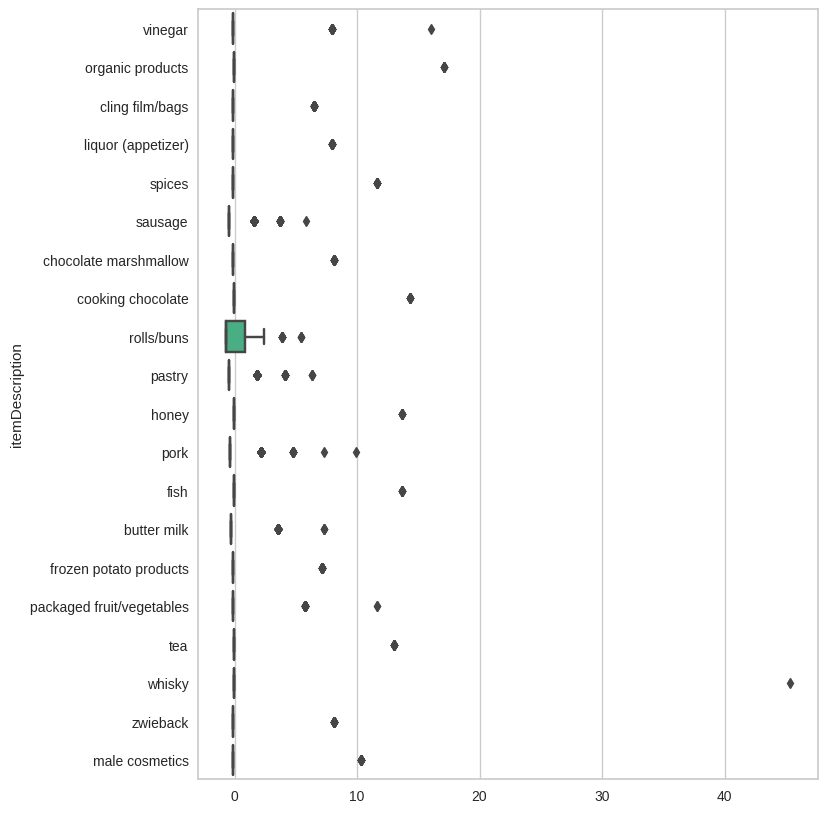

In [ ]:

# Randomly select a subset of columns
sample_columns = np.random.choice(X_train.columns, size=20, replace=False)

# Create a boxplot for the sampled columns
plt.figure(figsize=(8, 10))
sns.boxplot(data=X_train[sample_columns], orient='h')


In [ ]:
xgb_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7538017240284515, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4497269978348595,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3103748777915919,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=148, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

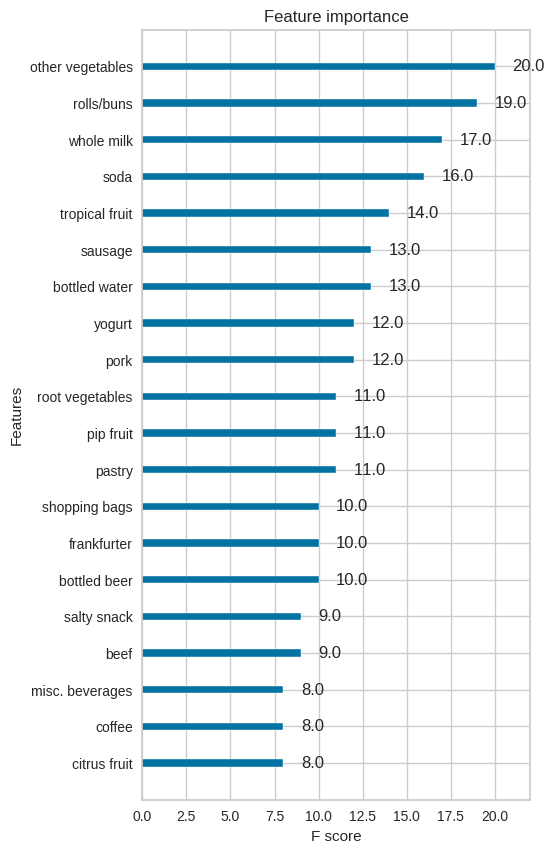

In [ ]:
fig, ax = plt.subplots(figsize=(5, 10))
xgb.plot_importance(xgb_model, ax=ax, max_num_features=20)


In [ ]:
pred_mgb = xgb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mat_mgb = confusion_matrix(y_test, pred_mgb)
mat_mgb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 44,  23],
       [ 10, 438]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


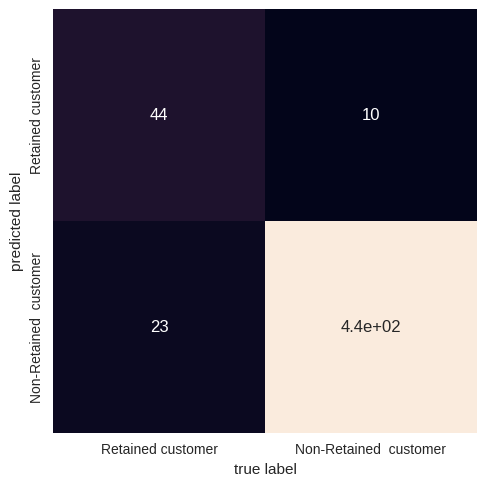

In [ ]:
class_names = ['Retained customer', 'Non-Retained  customer']
sns.heatmap(mat_mgb.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
print(classification_report(y_test, pred_mgb))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.81      0.66      0.73        67
           1       0.95      0.98      0.96       448

    accuracy                           0.94       515
   macro avg       0.88      0.82      0.85       515
weighted avg       0.93      0.94      0.93       515



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Frequent sets analysis using apriori analysis

##### $\rightarrow$  Examine distributions and relationships

##Frequent set for Retention = 1

In [ ]:
df_t.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,Year_Quarter,next_Year_Quarter,Retention,Values
17778,1000,2015-05-27,pickled vegetables,2015-Q2,2015-Q3,1,1
8395,1000,2015-03-15,whole milk,2015-Q1,2015-Q2,1,1
24544,1000,2015-03-15,yogurt,2015-Q1,2015-Q2,1,1
13331,1000,2014-06-24,whole milk,2014-Q2,2014-Q3,1,1
18196,1000,2015-07-24,misc. beverages,2015-Q3,2015-Q4,1,1


In [ ]:
df_t = df_t.drop(columns=[ 'Year_Quarter', 'Values', 'next_Year_Quarter'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

retention_1_df = df_t[df_t['Retention'] == 1]

print("\nDataFrame for Retention 1:")
retention_1_df


DataFrame for Retention 1:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,Retention
17778,1000,2015-05-27,pickled vegetables,1
8395,1000,2015-03-15,whole milk,1
24544,1000,2015-03-15,yogurt,1
13331,1000,2014-06-24,whole milk,1
18196,1000,2015-07-24,misc. beverages,1
...,...,...,...,...
11728,5000,2014-09-03,fruit/vegetable juice,1
19727,5000,2015-10-02,root vegetables,1
3578,5000,2015-10-02,soda,1
34885,5000,2015-10-02,semi-finished bread,1


Identifing Purchase pattern of retained customers by , member_number, date, itemdescription

In [ ]:
df_itemList_ret_1 = retention_1_df.groupby('Member_number').agg(lambda x: ', '.join(x)).reset_index()

# Display the first 15 rows of the result
df_itemList_ret_1.head(15)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-113-5d692c307a8b>:1: FutureWarning: ['Date', 'Retention'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_itemList_ret_1 = retention_1_df.groupby('Member_number').agg(lambda x: ', '.join(x)).reset_index()


,Member_number,itemDescription
0,1000,"pickled vegetables, whole milk, yogurt, whole ..."
1,1001,"frankfurter, white bread, rolls/buns, frankfur..."
2,1002,"specialty chocolate, butter, whole milk, tropi..."
3,1003,"sausage, dental care, rolls/buns, root vegetab..."
4,1004,"pip fruit, chocolate, whole milk, red/blush wi..."
5,1005,"rolls/buns, margarine, whipped/sour cream"
6,1006,"bottled water, shopping bags, rolls/buns, fran..."
7,1008,"dessert, white wine, liquor (appetizer), yogur..."
8,1009,"herbs, pastry, tropical fruit, yogurt, yogurt,..."
9,1010,"specialty bar, bottled water, kitchen towels, ..."


combined all items into list

In [ ]:
transactions = [a[1]['itemDescription'].tolist() for a in list(df_itemList_ret_1.groupby(['Member_number']))] ## Combing all the items in list format for each customer
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-114-0f56dc761ea1>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  transactions = [a[1]['itemDescription'].tolist() for a in list(df_itemList_ret_1.groupby(['Member_number']))] ## Combing all the items in list format for each customer


[['pickled vegetables, whole milk, yogurt, whole milk, misc. beverages, soda, sausage, hygiene articles, pastry, sausage, salty snack, semi-finished bread, canned beer'],
 ['frankfurter, white bread, rolls/buns, frankfurter, whole milk, curd, soda, beef, soda, whipped/sour cream, whole milk, sausage'],
 ['specialty chocolate, butter, whole milk, tropical fruit, sugar, frozen vegetables, other vegetables, butter milk'],
 ['sausage, dental care, rolls/buns, root vegetables, rolls/buns, detergent, frozen meals'],
 ['pip fruit, chocolate, whole milk, red/blush wine, cling film/bags, frozen fish, rolls/buns, root vegetables, chocolate, rolls/buns, canned beer, hygiene articles, whole milk, whole milk, shopping bags, other vegetables, other vegetables, dish cleaner, tropical fruit, pastry, packaged fruit/vegetables'],
 ['rolls/buns, margarine, whipped/sour cream'],
 ['bottled water, shopping bags, rolls/buns, frankfurter, flour, skin care, softener, rice, rolls/buns, chicken, chocolate, whol

In [ ]:
baskets = retention_1_df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index()
baskets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [ ]:
def one_hot_encoder(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
baskets_final = baskets.iloc[:, 1:baskets.shape[1]].applymap(one_hot_encoder)
baskets_final.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
# Finding the most frequent items sold together
frequent_itemsets = apriori(baskets_final, min_support=0.005, use_colnames=True, max_len=3).sort_values(by='support', ascending=False)
frequent_itemsets.head(25)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
139,0.495230,(whole milk)
85,0.403874,(other vegetables)
102,0.377277,(rolls/buns)
116,0.337381,(soda)
140,0.305869,(yogurt)
103,0.252096,(root vegetables)
132,0.251229,(tropical fruit)
9,0.231570,(bottled water)
108,0.224920,(sausage)
2030,0.212489,"(whole milk, other vegetables)"


In [ ]:
from mlxtend.frequent_patterns import association_rules
# Creating association rules for indicating astecedent and consequent items
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift', ascending=False)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.head(25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
32091,"(yogurt, coffee)",(chewing gum),0.005493,0.135714,2.794260
32094,(chewing gum),"(yogurt, coffee)",0.005493,0.113095,2.794260
31204,"(waffles, pork)",(pip fruit),0.005493,0.487179,2.653786
31205,(pip fruit),"(waffles, pork)",0.005493,0.029921,2.653786
23592,(white bread),"(rolls/buns, beverages)",0.006649,0.068862,2.617523
23589,"(rolls/buns, beverages)",(white bread),0.006649,0.252747,2.617523
28955,(soft cheese),"(rolls/buns, butter)",0.005782,0.142857,2.600752
28950,"(rolls/buns, butter)",(soft cheese),0.005782,0.105263,2.600752
27483,(chewing gum),"(yogurt, domestic eggs)",0.006071,0.125000,2.589072
27478,"(yogurt, domestic eggs)",(chewing gum),0.006071,0.125749,2.589072


## Frequent Sets analysis for Retetion=0

In [ ]:
retention_0_df = df_t[df_t['Retention'] == 0]

print("\nDataFrame for Retention 0:")
retention_0_df


DataFrame for Retention 0:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,Retention
11210,1019,2014-10-12,hamburger meat,0
27359,1019,2014-10-12,red/blush wine,0
23344,1024,2015-10-08,other vegetables,0
16267,1024,2015-10-08,tropical fruit,0
118,1024,2015-10-08,fish,0
...,...,...,...,...
37788,4995,2014-02-06,domestic eggs,0
28695,4995,2014-03-16,dish cleaner,0
12546,4995,2014-03-16,rice,0
19899,4998,2015-10-14,curd,0


In [ ]:
df_itemList_ret_0 = retention_0_df.groupby(['Member_number', 'Date'])['itemDescription'].agg(lambda x: ', '.join(x)).reset_index()

# Display the first 15 rows of the result
df_itemList_ret_0.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1019,2014-10-12,"hamburger meat, red/blush wine"
1,1024,2015-10-08,"other vegetables, tropical fruit, fish, root v..."
2,1029,2015-03-14,"ham, dessert"
3,1036,2014-01-20,"vinegar, fruit/vegetable juice"
4,1039,2015-05-31,"salty snack, rolls/buns"
5,1046,2015-06-18,"pastry, whole milk"
6,1046,2015-06-24,"pork, bottled water"
7,1071,2014-09-26,"fruit/vegetable juice, yogurt, roll products"
8,1084,2014-04-18,"other vegetables, pip fruit"
9,1089,2014-05-12,"sauces, yogurt"


In [ ]:
transactions = [a[1]['itemDescription'].tolist() for a in list(df_itemList_ret_0.groupby(['Member_number', 'Date']))] ## Combing all the items in list format for each customer
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['hamburger meat, red/blush wine'],
 ['other vegetables, tropical fruit, fish, root vegetables'],
 ['ham, dessert'],
 ['vinegar, fruit/vegetable juice'],
 ['salty snack, rolls/buns'],
 ['pastry, whole milk'],
 ['pork, bottled water'],
 ['fruit/vegetable juice, yogurt, roll products '],
 ['other vegetables, pip fruit'],
 ['sauces, yogurt'],
 ['domestic eggs, dessert'],
 ['fruit/vegetable juice, pip fruit'],
 ['dish cleaner, jam, ice cream, newspapers'],
 ['whole milk, meat, whipped/sour cream'],
 ['whole milk, grapes'],
 ['shopping bags, coffee'],
 ['berries, other vegetables'],
 ['other vegetables, sliced cheese'],
 ['root vegetables, canned vegetables, whole milk'],
 ['root vegetables, brown bread'],
 ['tropical fruit, bottled water'],
 ['brown bread, canned beer, rolls/buns, dessert'],
 ['candles, whole milk'],
 ['coffee, misc. beverages'],
 ['brown bread, canned beer'],
 ['instant coffee, red/blush wine'],
 ['bottled water, sugar'],
 ['coffee, canned beer'],
 ['condensed milk, onio

In [ ]:
baskets_0 = retention_0_df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index()
baskets_0.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,baby cosmetics,baking powder,beef,berries,beverages,bottled beer,...,tea,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt
0,1019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
baskets_final_0 = baskets_0.iloc[:, 1:baskets_0.shape[1]].applymap(one_hot_encoder)
baskets_final_0.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,baby cosmetics,baking powder,beef,berries,beverages,bottled beer,bottled water,...,tea,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets_0 = apriori(baskets_final_0, min_support=0.005, use_colnames=True, max_len=3).sort_values(by='support', ascending=False)
frequent_itemsets_0.head(25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
85,0.166287,(whole milk)
53,0.161731,(other vegetables)
65,0.132118,(rolls/buns)
74,0.125285,(soda)
86,0.102506,(yogurt)
80,0.095672,(tropical fruit)
6,0.072893,(bottled water)
20,0.070615,(citrus fruit)
58,0.068337,(pip fruit)
66,0.061503,(root vegetables)


In [ ]:
rules = association_rules(frequent_itemsets_0, metric="lift", min_threshold=1).sort_values('lift', ascending=False)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.head(25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
213,(pip fruit),"(citrus fruit, pork)",0.006834,0.100000,14.633333
208,"(citrus fruit, pork)",(pip fruit),0.006834,1.000000,14.633333
212,(pork),"(citrus fruit, pip fruit)",0.006834,0.115385,10.130769
209,"(citrus fruit, pip fruit)",(pork),0.006834,0.600000,10.130769
210,"(pip fruit, pork)",(citrus fruit),0.006834,0.600000,8.496774
211,(citrus fruit),"(pip fruit, pork)",0.006834,0.096774,8.496774
114,(sausage),(spread cheese),0.006834,0.120000,7.525714
115,(spread cheese),(sausage),0.006834,0.428571,7.525714
144,(sugar),(bottled water),0.006834,0.375000,5.144531
145,(bottled water),(sugar),0.006834,0.093750,5.144531


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-127-2093121c5bbc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_t.corr()


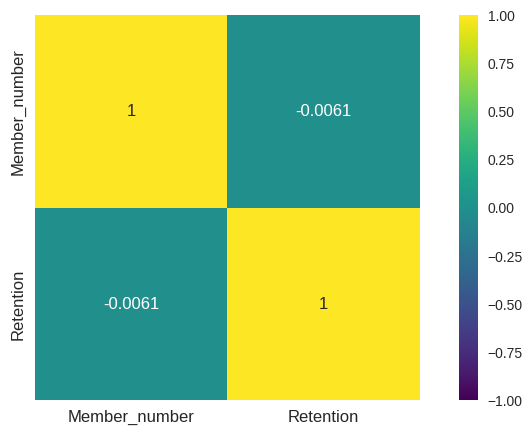

In [ ]:
corr_matrix = df_t.corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis')

plt.tick_params(labelsize=12);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
